# Mentale Gesundheit: Eine Reise durch die Psyche

## Eine Reise durch die Psyche: Wie Daten uns helfen können, mentale Gesundheit zu verstehen

## 1 - Einleitung
Depressionen, Angstzustände und Stress sind in unserer modernen Gesellschaft allgegenwärtig und betreffen Menschen jeden Alters, Geschlechts und Hintergrunds. Obwohl es viele Ressourcen gibt, die versuchen, das Bewusstsein für diese Themen zu schärfen, bleibt ihre Ursache größtenteils unbekannt. Eine Möglichkeit, mehr über diese Phänomene zu erfahren, besteht darin, die Daten der Depression Anxiety Stress Scales (DASS) zu nutzen, die zwischen 2017 und 2019 gesammelt wurden. Die DASS-Umfrage ist ein standardisierter Fragebogen, der darauf abzielt, Depressionen, Angstzustände und Stress bei Befragten zu messen. Entwickelt wurde der psychometrische Fragebogen von Dr. Peter Lovibond und Dr. Stephen Lovibond und besteht aus 42 Fragen, die jeweils von 1 bis 4 skaliert sind. Die Bewertungsmöglichkeiten sind unten abgebildet und bilden ab, ob die Frage sehr stark auf die befragte Person zutrifft (4 Apply to me very much, or most of the time) oder gar keine Übereinstimmung it der Frage vorhanden ist (1 Did not apply to me at all)

![DASS-Skala](db/demo1.png)


## 2 - Ziel des Notebooks
Analyse der DASS-Umfrageergebnisse und Untersuchung potenzieller Faktoren, die mit Depressionen, Angstzuständen und Stress assoziiert sind. Besonders im Vordergrund stehen Vorurteile, die es gegenüber Depressionen und ähnlichen Krankheiten gibt in Hinblick auf das Geschlecht und die Herkunft. . Ist es tatsächlich so, dass Frauen eher an einer Depression leiden? Trifft Menschen mit einem akademischen Abschluss eine Depression seltener, weil er wahrscheinlich ein höheres Gehalt verspricht oder ist das nur Schein? Gibt es einen Zusammenhang zwischen Depressionen und Herkunft? Auf diese und ähnliche Fragen wird in der Analyse eingegangen.

## 3 - Methodik

Wie bereits unter dem Punkt Einleitung angemerkt, wurden die Daten wurden durch eine Online-Version der DASS-Umfrage von 2017 bis 2019 gesammelt. Dadurch ist ein aussagekräftiges Ergebnis von fast 40.000 Daten entstanden. Ebenfalls schon erwähnt wurde die Skalierung durch die DASS-Umfrage, wodurch eine Bewertung der Ergebnisse ermöglicht wird. Insgesamt standen 42 Fragen zur Verfügung, die durch die Bewertung beantwortet werden mussten. Allerdings wurden nicht nur die Antworten gespeichert, sondern auch einerseits die Geschwindigkeit, in der diese beantwortet wurden und andererseits die Stelle, an der sie gefragt wurden, weil jeder Befragte eine zufällige Anordnung der Fragen erhalten hat. Darauffolgend wurde der TEN-ITEM PERSONALITY INVENTORY-(TIPI) durchgeführt, welcher Persönlichkeitseigenschaften analysiert. Bei dieser Umfrage stehen 10 Charaktereigenschaften zur Verfügung, die erneut skaliert und beantwortet werden müssen, wobei es hier 7 Bewertungsmöglichkeiten gibt.

![TIPI](db/TIPI.png)

Zuguterletzt wurden die Stammdaten der Teilnehmer befragt, welche Daten, wie Geschlecht, Alter, Herkunft enthalten.

![Stammdaten](db/Stammdaten.png)

Die Umfrage war für jeden offen, und die Teilnehmer waren motiviert, sie auszufüllen, um personalisierte Ergebnisse zu erhalten.
Die Daten, die in dieser Analyse verwendet wurden, wurden von Personen gesammelt, die einer Forschungsumfrage zugestimmt und ihre Daten für Forschungszwecke zur Verfügung gestellt haben.
Die Analyse wird basierend auf den Antworten zu jeder Frage sowie den demografischen und technischen Informationen durchgeführt, die von den Teilnehmern bereitgestellt wurden. Insgesamt hat es

Durch die Analyse der Daten der DASS-Umfrage hoffen wir, Einblicke in die Faktoren zu gewinnen, die mit Depressionen, Angstzuständen und Stress assoziiert sind. Diese Erkenntnisse könnten dazu beitragen, Präventions- und Behandlungsansätze zu entwickeln, um das Leben von Menschen, die von diesen Zuständen betroffen sind, zu verbessern. Idealerweise kann dadurch eine Entstigmatisierung von psychischen Krankheiten erreicht werden.

## 4 - Projektstruktur

### Setup

![Architektur](db/Projekt-Architektur.png)

Für das Projekt werden auf den lokalen Rechnern Conda für die Python-Execution, DataSpell als IDE und je nach Projektmitglied teilweise MongoDB Compass oder DataGrip als GUI verwendet, um einen einfacheren Einblick zum Datenbank-Server zu erhalten. Die Datenbank selbst ist eine MongoDB Instanz, welche am FHTW-Server gehostet wird. Dadurch sind die Daten zentral für alle Teammitglieder zugänglich. Zusätzlich gibt es auf GitHub ein Repository, welches alle wichtigen Files sowie dieses Notebook selbst beinhaltet, um allen Mitgliedern des Teams die simultane Bearbeitung zu ermöglichen.

### Komponente und Versionen

- Conda: 22.9
- Python: 3.9
- Pymongo: 4.3.3
- Pandas: 1.4.4
- Matplotlib: 3.5.2
- Numpy: 1.21.5

## 5 - Datenimport und -export

Bevor wir nun den Datensatz analysieren können, müssen wir die Daten zur Datenbank hochladen, um sie später weiterhin zentral zur Verfügung zu haben. Dafür müssen wir einige Python Packages installieren, die DB-Verbindung einrichten und anschließend den Datensatz in einem Pandas-Dataframe speichern.

### Import von Packages

In [290]:
try:
    import pymongo as mdb
    import csv
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    import geopandas as gpd
    import seaborn as sns
    import pycountry

except ImportError:
    !pip3 install pymongo
    !pip3 install python-csv
    !pip3 install pandas
    !pip3 install numpy
    !pip3 install geopandas
    !pip3 install seaborn
    !pip3 install pycountry
    import pymongo as mdb
    import csv
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    import geopandas as gpd
    import seaborn as sns
    import pycountry




### Die Verbindung zum MongoDB-Server wird eingerichtet

In [7]:
try:
    client = mdb.MongoClient("mongodb://pt-n20.p4001.w3.cs.technikum-wien.at:4001")

    db = client.mental_health_db
    collection = db.survey

    if 'mental_health_db' in client.list_database_names():
        print('Connected to database')
    if 'survey' in db.list_collection_names():
        print('Connected to collection')
except mdb.errors.ConnectionFailure as e:
    print(e)

Connected to database
Connected to collection


### CSV-Datensatz hochladen

Die Daten wurden mithilfe des Codes, den man darunter sieht, auf den Server hochgeladen und anschließend auskommentiert, damit dies nicht unabsichtlich wieder ausgeführt werden kann.

In [ ]:
'''data = pd.read_csv('db/data.csv', delimiter='\t')
keys = data.columns.tolist()
data_dict = data.to_dict('records')
for item in data_dict:
    record = {}
    for key in keys:
        record[key] = item[key]
    collection.insert_one(record)'''

### Daten vom Server abfragen und in Pandas Dataframe speichern

In [8]:
cursor = collection.find({})
data = pd.DataFrame(list(cursor))
data = data.drop('_id', axis=1)
#client.close()

#### Alternativ falls der Server nicht funktioniert von lokaler CSV-Datei abfragen

In [ ]:
# data = pd.read_csv('db/data.csv', delimiter='\t')

In [10]:
print(data)

       Q1A  Q1I    Q1E  Q2A  Q2I   Q2E  Q3A  Q3I    Q3E  Q4A  ...  screensize  \
0        4   28   3890    4   25  2122    2   16   1944    4  ...           1   
1        4    2   8118    1   36  2890    2   35   4777    3  ...           2   
2        3    7   5784    1   33  4373    4   41   3242    1  ...           2   
3        2   23   5081    3   11  6837    2   37   5521    1  ...           2   
4        2   36   3215    2   13  7731    3    5   4156    4  ...           2   
...    ...  ...    ...  ...  ...   ...  ...  ...    ...  ...  ...         ...   
39770    2   31   3287    1    5  2216    3   29   3895    2  ...           2   
39771    3   14   4792    4   41  2604    3   15   2668    4  ...           1   
39772    2    1  25147    1    4  4555    2   14   3388    1  ...           2   
39773    3   36   4286    1   34  2736    2   10   5968    2  ...           2   
39774    2   28  32251    1   22  3317    2    4  11734    1  ...           1   

       uniquenetworklocatio

## 6 - Demografische Analyse des Datensatzes

Wir fangen damit an, den Datensatz zu analysieren, um einen Überblick zu bekommen.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB


In [ ]:
data.describe()

Konkret jedoch wollen wir wissen, welche Personen haben an dieser Umfrage teilgenommen und welche Merkmale machen diesen Datensatz aus. Dafür verschaffen wir uns einen deskriptiven Überblick zu folgenden Kategorien des Datensatzes:

- Ausbildung
- Gegend
- Geschlecht
- Englisch als Muttersprache
- Alter
- Händigkeit
- Religion
- Sexuelle Orientation
- Ethnie
- Gewählt
- Verheiratet
- Familiengröße
- Studienfach

### Ausbildung

C:\Users\kevin\AppData\Local\Temp\ipykernel_12860\2847404692.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.1f}%'.format(x) for x in ax.get_yticks()])


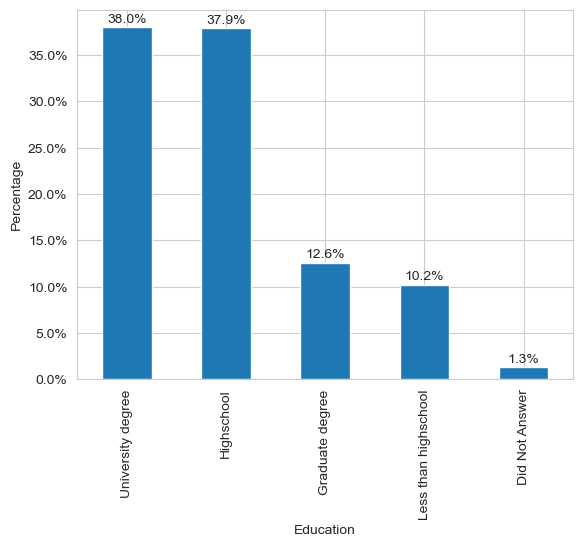

In [306]:
education = data['education'].map({0: 'Did Not Answer', 1: 'Less than highschool', 2: 'Highschool', 3: 'University degree', 4: 'Graduate degree'})
education_percent = education.value_counts(normalize=True) * 100
ax = education_percent.plot(kind='bar')
ax.set_xlabel('Education')
ax.set_ylabel('Percentage')
ax.set_yticklabels(['{:,.1f}%'.format(x) for x in ax.get_yticks()])
for i, v in enumerate(education_percent):
    ax.text(i, v+0.5, '{:.1f}%'.format(v), ha='center')
plt.show()

Wir sehen, dass ungefähr 38% der Teilnehmer*Innen einen Bachelor-Abschluss, knapp darunter 37.9% einen Highschool-Abschluss, 12.6% einen Master-Abschluss und 10.2% die Highschool nicht abgeschlossen haben. Im Datensatz haben 1.3% jeweils keine Antwort zu dieser Frage gegeben.

### Gegend

In [ ]:
urban = data['urban'].map({0: 'Did Not Answer', 1: 'Rural', 2: 'Suburban', 3: 'Urban'})
urban_percent = urban.value_counts(normalize=True) * 100
ax = urban_percent.plot(kind='pie', autopct='%.1f%%')
ax.set_title('Percentage Distribution of Category Urban')
plt.show()

Das Diagramm zeigt die prozentuale Verteilung der Antworten auf die Frage nach dem Wohnort. Die größte Gruppe der Befragten (44,9%) lebt in städtischen Gebieten, gefolgt von der Gruppe der Vorortbewohner (33,3%) und der Gruppe der Landbewohner (20,9%). Nur eine sehr kleine Gruppe (1%) hat keine Antwort auf die Frage gegeben.

### Geschlecht

In [ ]:
gender = data['gender'].map({0: 'Other', 1: 'Male', 2: 'Female'})
gender_percent = gender.value_counts(normalize=True) * 100
ax = gender_percent.plot(kind='bar')
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')
ax.set_yticklabels(['{:,.1f}%'.format(x) for x in ax.get_yticks()])
for i, v in enumerate(gender_percent):
    ax.text(i, v+0.5, '{:.1f}%'.format(v), ha='center')
plt.show()

Überraschenderweise sind 77.4% der Personen, die an der Umfrage teilgenommen haben, Frauen. Im Gegensatz dazu beträgt der Anteil der Männer 22.4% und die der anderen Geschlechter 0.2%.

### Englisch als Muttersprache

In [ ]:
engnat = data['engnat'].map({1: 'Yes', 2: 'No'})
engnat_percent = engnat.value_counts(normalize=True) * 100
ax = engnat_percent.plot(kind='pie', autopct='%.1f%%')
ax.set_title('Percentage Distribution of English Native Speakers')
plt.show()

In unserem Datensatz haben 63.8% Englisch nicht als Muttersprache und 36.2% hingegen schon.

### Alter

C:\Users\kevin\AppData\Local\Temp\ipykernel_8292\1368563100.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.1f}%'.format(x) for x in ax.get_yticks()])


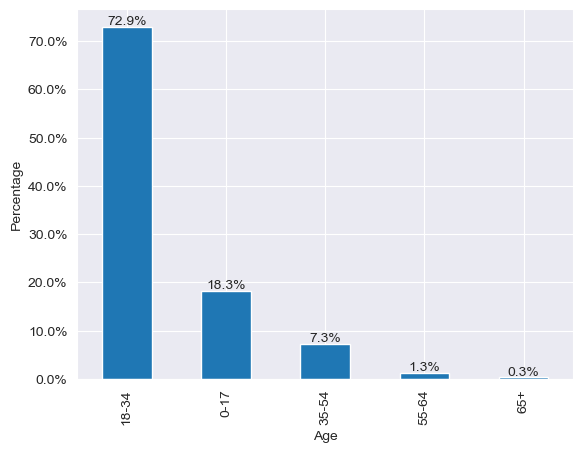

In [9]:
age_groups = pd.cut(data['age'], bins=[0, 17, 34, 54, 64, 150], labels=['0-17', '18-34', '35-54', '55-64', '65+'])
age_group_percent = age_groups.value_counts(normalize=True) * 100
ax = age_group_percent.plot(kind='bar')
ax.set_xlabel('Age')
ax.set_ylabel('Percentage')
ax.set_yticklabels(['{:,.1f}%'.format(x) for x in ax.get_yticks()])
for i, v in enumerate(age_group_percent):
    ax.text(i, v+0.5, '{:.1f}%'.format(v), ha='center')
plt.show()

Wir gruppieren das Alter sinnvoll und erhalten folgende Prozentsätze für die Altersgruppen:

- 0-17: 18.3%
- 18-34: 72.9%
- 35-54: 7.3%
- 55-64: 1.3%
- 65+: 0.3%

### Händigeit
Es wird untersucht, wie viel Prozent der Befragten Linkshänder, Rechtshänder beziehungsweise beidhändig sind. In einem ersten Schritt werden die Daten einfach ausgegeben.

In [ ]:
hand = data['hand'].map({2:'Linkshänder',1:'Rechtshänder',3:'Beidhändig'})

hand_percent=hand.value_counts(normalize=True)*100

print(hand_percent)


In einem zweiten Schritt wird zur Veranschaulichung ein Balkendiagramm erstellt, welches das Verhältnis zwischen Linkshändern,
Rechtshändern und Beidhändigen aufzeigt.

In [ ]:
labels = ['Linkshänder', 'Rechtshänder', 'Beidhändig']
values = [hand_percent.Linkshänder, hand_percent.Rechtshänder, hand_percent.Beidhändig]

plt.bar(labels, values)
plt.title('Händigkeit')
plt.xlabel('Hand')
plt.ylabel('Prozent')
plt.show()

### Religion
Es wird untersucht, wie das Religionsbekenntnis unter den Befragten verteilt ist. In einem ersten Schritt werden die Daten einfach ausgegeben.

In [ ]:
religions = data['religion'].map({1:'Agnostiker',2:'Atheisten', 3:'Buddhisten', 4:'Christen(Katholisch)',
            5:'Christ(Mormonen)',6: 'Christen(Protestanten)', 7:'Christen(Anderes)', 8:'Hindus',9: 'Juden', 10:'Muslime', 11:'Sikh',12: 'Andere'})

rel_percent=religions.value_counts(normalize=True)*100
print(rel_percent)

In einem zweiten Schritt wird zur Veranschaulichung ein Kreisdiagramm erstellt, was das Verhältnis der einzelnen Religionen zueinander unter den Befragten aufzeigt.

In [ ]:
plt.pie(rel_percent, labels=rel_percent.index, autopct='%1.2f%%', textprops={'fontsize': 12})
plt.legend(bbox_to_anchor=(2.2,0.5), loc="center right", fontsize=12)
plt.title('Religionen')
plt.show()

### Sexuelle Orientierung
Es wird untersucht, wie die sexuelle Orientierung unter den Befragten verteilt ist. In einem ersten Schritt werden die Daten einfach ausgegeben.

In [4]:
orientations = data['orientation'].map({1:'Heterosexuell', 2:'Bisexuell',3: 'Homosexuell',4: 'Asexuell',5: 'Anderes'})
orientations_percent=orientations.value_counts(normalize=True)*100

print(orientations_percent)

Heterosexuell    66.189385
Bisexuell        13.652976
Anderes           9.436535
Asexuell          5.389189
Homosexuell       5.331915
Name: orientation, dtype: float64


In einem zweiten Schritt wird zur Veranschaulichung ein Kreisdiagramm erstellt, welches das Verhältnis der einzelnen Religionen zueinander unter den Befragten aufzeigt.

In [ ]:
labels = ['Heterosexuell', 'Bisexuell', 'Homosexuell', 'Asexuell', 'Anderes']
values = [orientations_percent.Heterosexuell,orientations_percent.Bisexuell, orientations_percent.Homosexuell, orientations_percent.Asexuell,orientations_percent.Anderes]

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sexuelle Orientierung')
plt.show()

### Ethnische Gruppen
Es wird untersucht, was für eine Verteilung der Ethnischen Gruppen vorliegt. In einem ersten Schritt werden die Daten einfach ausgegeben.

In [ ]:
races = data['race'].map({10: "Asiaten", 20: "Araber", 30: "Schwarze", 40: "IndigeneBevölkerungAustraliens", 50: "IndigeneBevölkerungAmerikas", 60: "Weiße", 70: "Anderes"})
races_percent=races.value_counts(normalize=True)*100

print(races_percent)

In einem zweiten Schritt wird zur Veranschaulichung ein Balkendiagramm erstellt, welches das Verhältnis der einzelnen Ethnischen Gruppen zueinander unter den Befragten aufzeigt.

In [321]:
labels = ['Asiaten','Araber','Schwarze','Indigene Bevölkerung Australiens','Indigene Bevölkerung  Amerikas','Weiße', 'Anderes']
values = [races_percent.Asiaten,races_percent.Araber, races_percent.Schwarze, races_percent.IndigeneBevölkerungAustraliens,
          races_percent.IndigeneBevölkerungAmerikas, races_percent.Weiße,races_percent.Anderes]
plt.bar(labels, values)
plt.xlabel("Ethnische Gruppe")
plt.ylabel("Anzahl")
plt.title("Verteilung Ethnischer Gruppen")
plt.xticks(rotation=45, ha='right')
plt.show()

NameError: name 'races_percent' is not defined

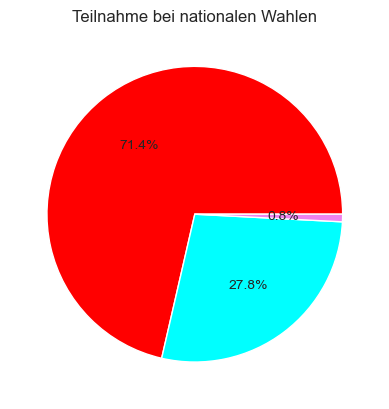

In [325]:
voted = data['voted'].map({0:'Keine Antwort',1: 'Ja', 2: 'Nein'})
value_counts_voted = voted.value_counts()
plt.pie(value_counts_voted, autopct='%1.1f%%',colors=['red','cyan','violet'])
plt.title('Teilnahme bei nationalen Wahlen')
plt.show()

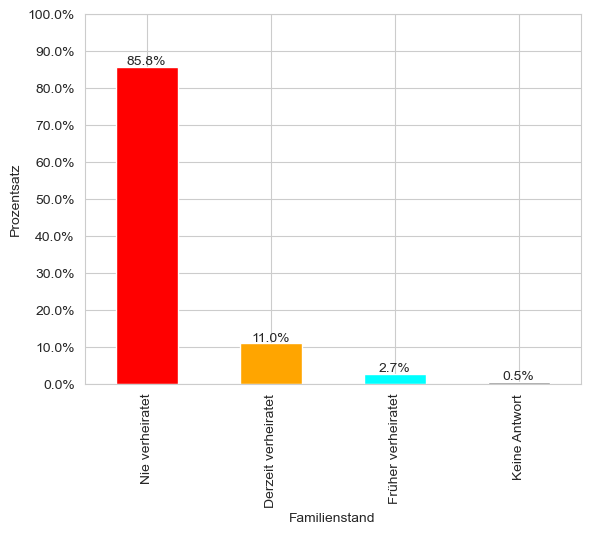

In [217]:
married = data['married'].dropna()
value_counts_married = married.value_counts()
married_dict ={0: 'Keine Antwort', 1: 'Nie verheiratet', 2: 'Derzeit verheiratet', 3: 'Früher verheiratet'}
married_legend = data['married'].replace(married_dict)
married_counts = married_legend.value_counts()
married_percent = married_counts * 100 / married_counts.sum()
ax = married_percent.plot(kind='bar', color=['red','orange','cyan','grey'])
ax.set_xlabel('Familienstand')
ax.set_ylabel('Prozentsatz')
ax.set_yticks(range(0, 101, 10))
ax.set_yticklabels(['{:,.1f}%'.format(x) for x in range(0, 101, 10)])
for i, v in enumerate(married_percent):
    ax.text(i, v+0.5, '{:.1f}%'.format(v), ha='center')
plt.show()


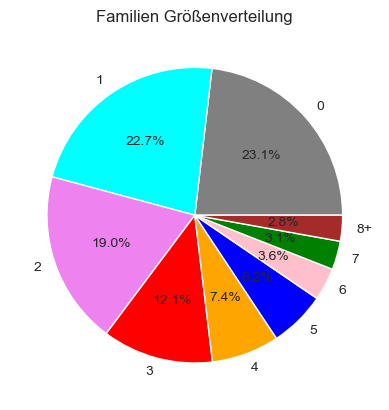

In [301]:
family_size = data['familysize'].dropna()
family_size = family_size.apply(lambda x: '8+' if isinstance(x, int) and x >= 8 else str(x))
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8+']
plt.pie(family_size.value_counts(), labels=labels, autopct='%1.1f%%', colors=['grey', 'cyan', 'violet', 'red', 'orange', 'blue', 'pink', 'green', 'brown'])
plt.title('Familien Größenverteilung')
plt.show()


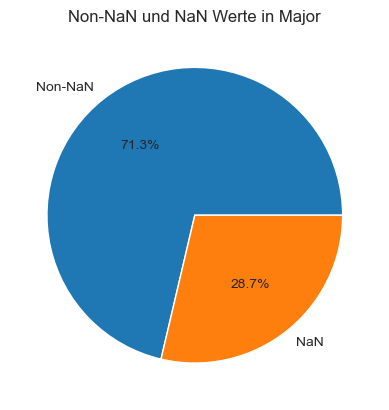

In [317]:
data['major_category'] = data['major'].apply(lambda x: 'Non-NaN' if x is not None and x == x else 'NaN')
major_counts = data['major_category'].value_counts()
major_percent = major_counts * 100 / major_counts.sum()
major_percent.plot(kind='pie', autopct='%1.1f%%')
plt.title('Non-NaN und NaN Werte in Major')
plt.ylabel('')
plt.show()

## DASS-Scores berechnen

In [233]:
question_category_map = {
    'Q3A': 'Depression',
    'Q5A': 'Depression',
    'Q10A': 'Depression',
    'Q13A': 'Depression',
    'Q16A': 'Depression',
    'Q17A': 'Depression',
    'Q21A': 'Depression',
    'Q24A': 'Depression',
    'Q26A': 'Depression',
    'Q31A': 'Depression',
    'Q34A': 'Depression',
    'Q37A': 'Depression',
    'Q38A': 'Depression',
    'Q42A': 'Depression',
    'Q2A': 'Anxiety',
    'Q4A': 'Anxiety',
    'Q7A': 'Anxiety',
    'Q9A': 'Anxiety',
    'Q15A': 'Anxiety',
    'Q19A': 'Anxiety',
    'Q20A': 'Anxiety',
    'Q23A': 'Anxiety',
    'Q25A': 'Anxiety',
    'Q28A': 'Anxiety',
    'Q30A': 'Anxiety',
    'Q36A': 'Anxiety',
    'Q40A': 'Anxiety',
    'Q41A': 'Anxiety',
    'Q1A': 'Stress',
    'Q6A': 'Stress',
    'Q8A': 'Stress',
    'Q11A': 'Stress',
    'Q12A': 'Stress',
    'Q14A': 'Stress',
    'Q18A': 'Stress',
    'Q22A': 'Stress',
    'Q27A': 'Stress',
    'Q29A': 'Stress',
    'Q32A': 'Stress',
    'Q33A': 'Stress',
    'Q35A': 'Stress',
    'Q39A': 'Stress'
}

print(data.columns)

depression_cols = ['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A', 'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A']
anxiety_cols = ['Q2A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q19A', 'Q20A', 'Q23A', 'Q25A', 'Q28A', 'Q30A', 'Q36A', 'Q40A', 'Q41A']
stress_cols = ['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'Q22A', 'Q27A', 'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A']
data['Depression'] = data[depression_cols].sum(axis=1)-14
data['Anxiety'] = data[anxiety_cols].sum(axis=1)-14
data['Stress'] = data[stress_cols].sum(axis=1)-14

print(data)

Index(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A',
       ...
       'familysize', 'major', 'Depression', 'Anxiety', 'Stress', 'age_group',
       'Depression Category', 'Anxiety Category', 'Stress Category',
       'major_category'],
      dtype='object', length=180)
       Q1A  Q1I    Q1E  Q2A  Q2I   Q2E  Q3A  Q3I    Q3E  Q4A  ...  familysize  \
0        4   28   3890    4   25  2122    2   16   1944    4  ...           2   
1        4    2   8118    1   36  2890    2   35   4777    3  ...           4   
2        3    7   5784    1   33  4373    4   41   3242    1  ...           3   
3        2   23   5081    3   11  6837    2   37   5521    1  ...           5   
4        2   36   3215    2   13  7731    3    5   4156    4  ...           4   
...    ...  ...    ...  ...  ...   ...  ...  ...    ...  ...  ...         ...   
39770    2   31   3287    1    5  2216    3   29   3895    2  ...           2   
39771    3   14   4792    4   41  2604    3   15   2668  

In [ ]:
columns_check = ['Depression','Anxiety','Stress','Depression Category','Anxiety Category','Stress Category']
for column in columns_check:
    if column not in data.columns:
        data['Depression'] = data[depression_cols].sum(axis=1)-14
        data['Anxiety'] = data[anxiety_cols].sum(axis=1)-14
        data['Stress'] = data[stress_cols].sum(axis=1)-14
        data['Depression Category'] = pd.cut(data['Depression'], bins=[-1, 9, 13, 20, 27, float('inf')], labels=['Normal', 'Mild', 'Moderate', 'Severe', 'Extremely Severe'])
        data['Anxiety Category'] = pd.cut(data['Anxiety'], bins=[-1, 7, 9, 14, 19, float('inf')], labels=['Normal', 'Mild', 'Moderate', 'Severe', 'Extremely Severe'])
        data['Stress Category'] = pd.cut(data['Stress'], bins=[-1, 14, 18, 25, 33, float('inf')], labels=['Normal', 'Mild', 'Moderate', 'Severe', 'Extremely Severe'])


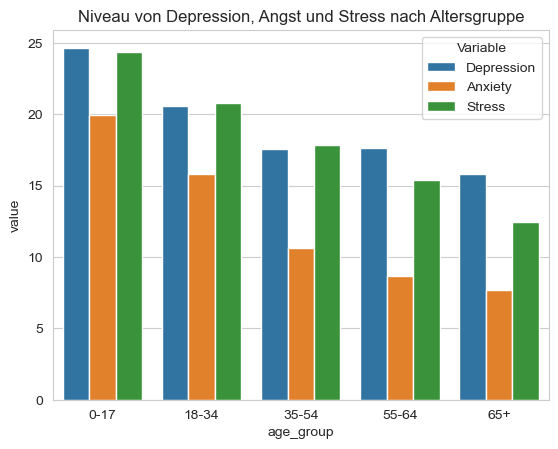

In [256]:
bins = [0, 17, 34, 54, 64, float('inf')]
labels = ['0-17', '18-34', '35-54', '55-64', '65+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)
depression_data = pd.pivot_table(data, values='Depression', index='age_group', aggfunc='mean')
anxiety_data = pd.pivot_table(data, values='Anxiety', index='age_group', aggfunc='mean')
stress_data = pd.pivot_table(data, values='Stress', index='age_group', aggfunc='mean')
heatmap_data = pd.concat([depression_data, anxiety_data, stress_data], axis=1)
heatmap_data = heatmap_data.reset_index()
melted_data = pd.melt(heatmap_data, id_vars='age_group', value_vars=['Depression', 'Anxiety', 'Stress'], var_name='Variable')
sns.barplot(data=melted_data, x='age_group', y='value', hue='Variable')
plt.title('Niveau von Depression, Angst und Stress nach Altersgruppe')
plt.show()


In diesem gruppierten Balkendiagramm sieht man die drei Kategorien für jede Altersgruppe. In diesem Diagramm wird der Durchschnittswert (Mean) für jede Kategorie verwendet, um sie zu analysieren. Es ist erkennbar, dass junge Menschen ein höheres Risiko haben, unter diesen Kategorien zu leiden, je jünger sie sind. Auffällig ist, dass die Altersgruppe 0-17 von schwerer Depression, extrem schwerer Angst und moderatem Stress betroffen ist. Die Werte, die aus dem Diagramm abgelesen werden, werden mit der obenstehenden Tabelle verglichen, um das Niveau der jeweiligen Kategorie zu bestimmen.

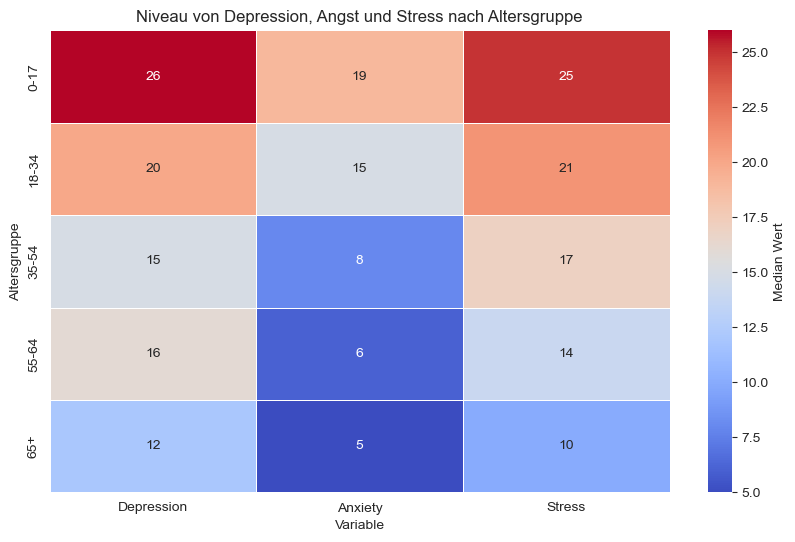

In [210]:
bins = [0, 17, 34, 54, 64, float('inf')]
labels = ['0-17', '18-34', '35-54', '55-64', '65+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)
depression_data = pd.pivot_table(data, values='Depression', index='age_group', aggfunc='median')
anxiety_data = pd.pivot_table(data, values='Anxiety', index='age_group', aggfunc='median')
stress_data = pd.pivot_table(data, values='Stress', index='age_group', aggfunc='median')
heatmap_data = pd.concat([depression_data, anxiety_data, stress_data], axis=1)
plt.figure(figsize=(10, 6))
sns.heatmap(data=heatmap_data, cmap='coolwarm', annot=True, fmt='.0f', linewidths=.5, cbar_kws={'label': 'Median Wert'})
plt.title('Niveau von Depression, Angst und Stress nach Altersgruppe')
plt.xlabel('Variable')
plt.ylabel('Altersgruppe')
plt.show()


Es wurde eine Heatmap erstellt, die die Altersgruppe und Kategorien (Depression, Angst, Stress) zeigt. In dieser Heatmap werden die Medianwerte für jede Altersgruppe und jeweilige Kategorie dargestellt. Mit dieser Analyse mittels Median erhält man einen klareren Überblick Je höher der Wert, desto problematischer ist die Situation in dieser Analyse. Die Heatmap zeigt, dass junge Menschen ein höheres und häufigeres Risiko haben, an Depressionen, Angstzuständen und Stress zu leiden. Es lässt sich ein Trend erkennen, dass je älter man wird, desto weniger von Depression, Anxiety und Stress betroffen ist. Die Altersgruppe, die am wenigsten von Depression, Anxiety und Stress betroffen ist, sind Menschen im Alter von 65 Jahren und älter. Es fällt auf, dass ihr Depressionsniveau als mild und ihr Niveau von Anxiety und Stress als normal eingestuft wird.

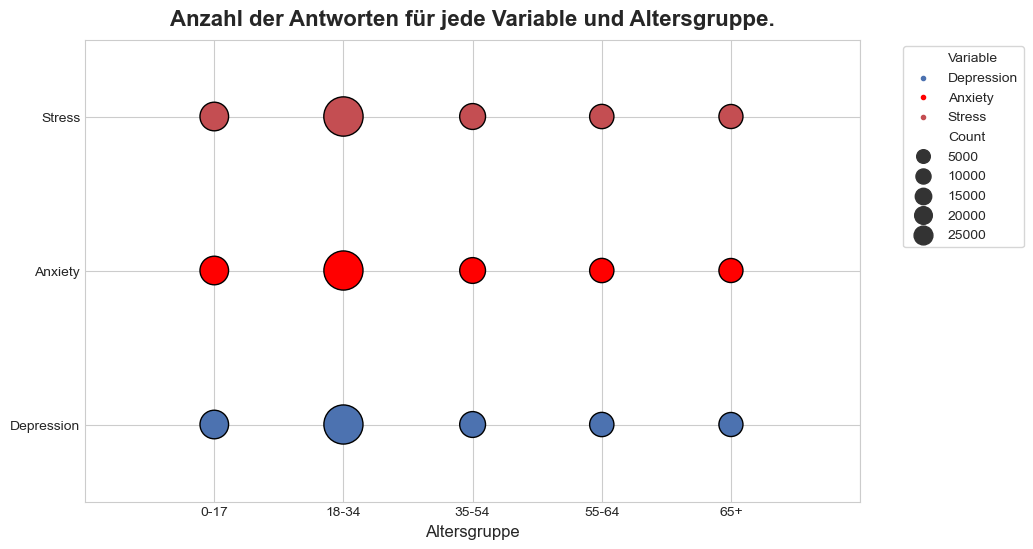

In [289]:
bins = [0, 17, 34, 54, 64, 150, 190]
labels = ['0-17', '18-34', '35-54', '55-64', '65+', '']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)
pivot = pd.pivot_table(data=data, values=['Depression', 'Anxiety', 'Stress'], index='age_group', aggfunc=lambda x: (x >= 1).sum())
melted_data = pd.melt(pivot.reset_index(), id_vars='age_group', value_vars=['Depression', 'Anxiety', 'Stress'], var_name='Variable', value_name='Count'); melted_data = melted_data[melted_data['age_group'] != '']
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=melted_data, x='age_group', y='Variable', size='Count', sizes=(300, 800), hue='Variable', alpha=1, edgecolor='black', linewidth=1, palette=['#4C72B0', 'red', '#C44E52'], ax=ax)
ax.tick_params(axis='both', which='both', length=0)
ax.set_xlabel('Altersgruppe', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.set_title('Anzahl der Antworten für jede Variable und Altersgruppe.', fontweight='bold', fontsize=16, pad=10)
ax.legend(title='', loc='upper right', bbox_to_anchor=(1.22, 1), markerscale=0.5)
ax.set_xlim(-1, len(labels)-1)
ax.set_ylim(-0.5, 2.5)
plt.show()

Der Bubble Chart zeigt, dass die Altersgruppe von 18-34 Jahren die höchste Anzahl in unserem Stichprobe ist, die Symptome von Stress, Anxiety und Depression erleben. Im Gegensatz dazu sind die Altersgruppen von 0-17 Jahren, 55-64 Jahren und 65+ Jahren weniger betroffen. Die Ergebnisse deuten darauf hin, dass Personen im Alter von 18-34 Jahren anfälliger für diese Symptome sind als andere Altersgruppen.

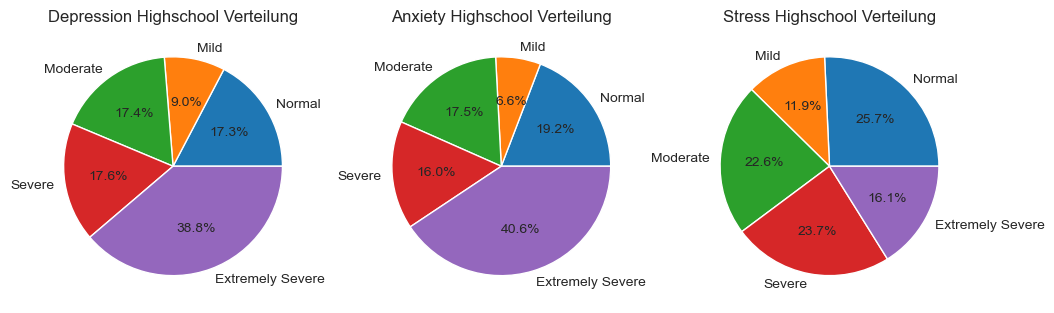

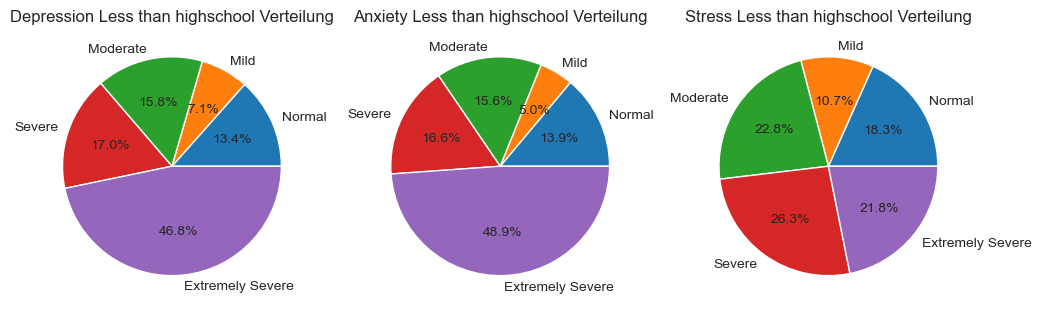

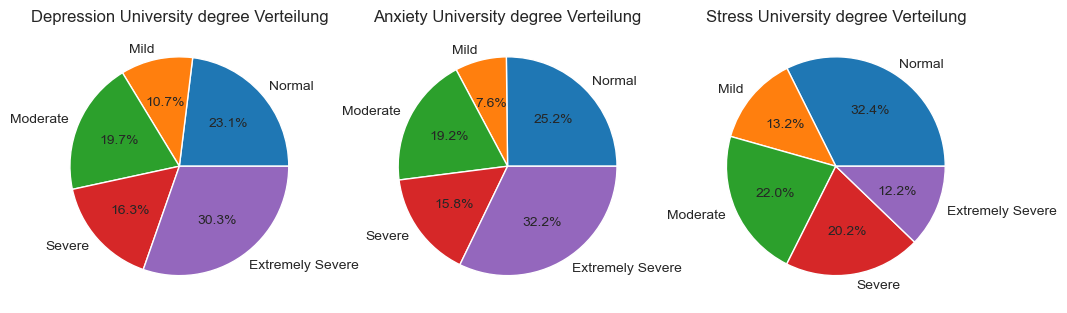

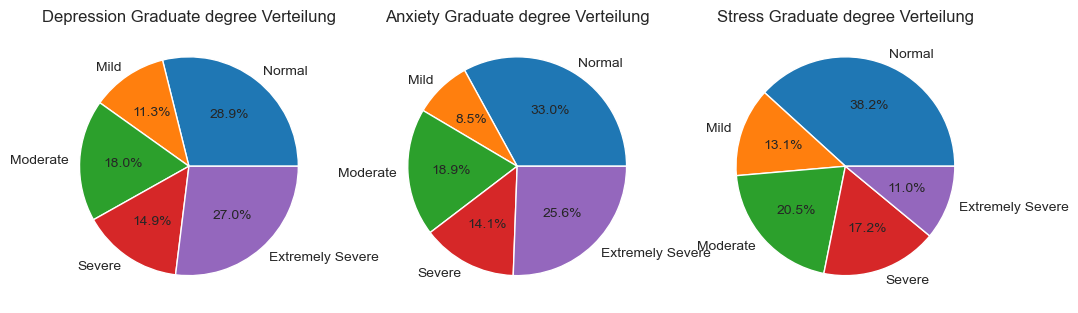

In [313]:
data['education'] = data['education'].fillna(0)
for var in ['Depression', 'Anxiety', 'Stress']:
    data[f'{var} Category'] = pd.cut(data[var], bins=bins[var], labels=labels)
percentages = {}
for var in ['Depression', 'Anxiety', 'Stress']:
    grouped = data.groupby([education, f'{var} Category'])[var].count()
    percentages[var] = grouped.groupby(level=0).apply(lambda x: 100 * x / x.sum())
pie_count = 0
for edu in education.unique():
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    plots_per_edu = 0
    has_data = False
    for i, var in enumerate(['Depression', 'Anxiety', 'Stress']):
        pie_data = percentages[var].loc[edu].drop(0, errors='ignore')
        if not pie_data.empty:
            axes[plots_per_edu].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%')
            axes[plots_per_edu].set_title(f'{var} {edu} Verteilung')
            plots_per_edu += 1
            has_data = True
            pie_count += 1
            if pie_count == 12:
                break
    if has_data:
        plt.show()
    if pie_count == 12:
        break

Die Ergebnisse zeigen, dass das Bildungsniveau einen großen Einfluss auf die mentale Gesundheit hat. Personen, die die High-School nicht abgeschlossen haben, weisen den höchsten Prozentsatz an Befragten auf, die unter extrem schwerer Depression (46.8%), Angst (48.9%) und Stress (21.8%) leiden. Personen mit einem Abschluss auf Hochschul- oder Diplomniveau zeigen hingegen niedrigere Prozentsätze an extrem schweren Depressionen, Angst und Stress. Insbesondere weisen Personen mit einem Diplomabschluss den niedrigsten Prozentsatz an Befragten auf, die unter extrem schweren Depressionen (27.0%), Angst (25.6%) und Stress (11.0%) leiden. Diese Ergebnisse deuten darauf hin, dass ein höheres Bildungsniveau möglicherweise mit einem geringeren Risiko für mentale Belastungen verbunden ist.

In [285]:
def get_iso_a3(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).alpha_3
    except AttributeError:
        return float('nan')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

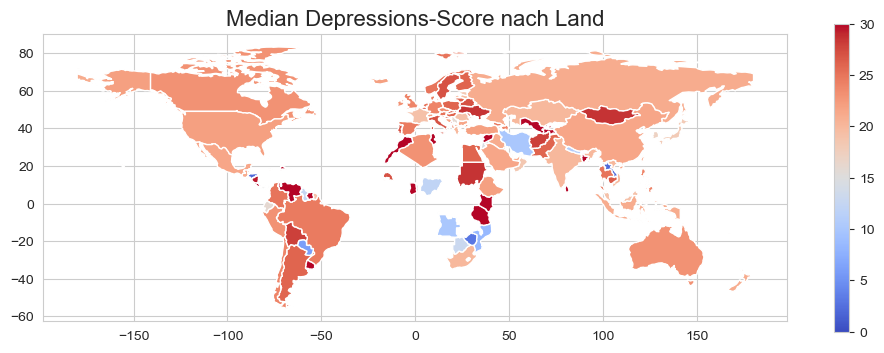

In [294]:
depression_data = data.groupby('country')['Depression'].median().reset_index()
depression_data['iso_a3'] = depression_data['country'].apply(get_iso_a3)
depression_data = depression_data[~depression_data['iso_a3'].duplicated()]
merged_data = world.merge(depression_data, on='iso_a3', how='left')
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Median Depressions-Score nach Land', fontsize=16)
merged_data.plot(column='Depression', cmap='coolwarm', legend=True, ax=ax, vmin=0, vmax=30)
plt.show()

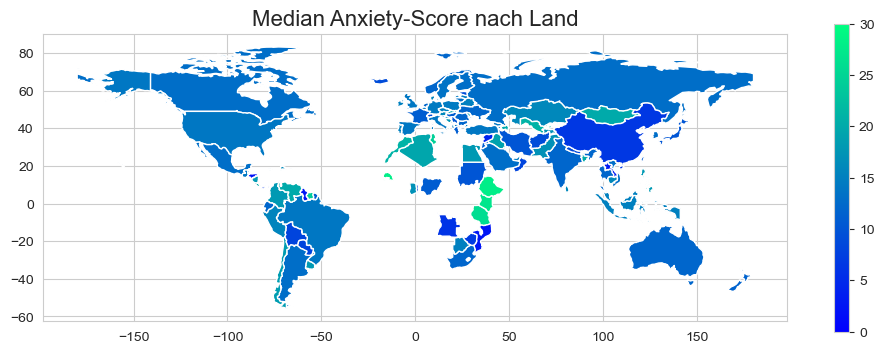

In [315]:
anxiety_data = data.groupby('country')['Anxiety'].median().reset_index()
anxiety_data['iso_a3'] = anxiety_data['country'].apply(get_iso_a3)
anxiety_data = anxiety_data[~anxiety_data['iso_a3'].duplicated()]
merged_data = world.merge(anxiety_data, on='iso_a3', how='left')
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Median Anxiety-Score nach Land', fontsize=16)
merged_data.plot(column='Anxiety', cmap='winter', legend=True, ax=ax, vmin=0, vmax=30)
plt.show()

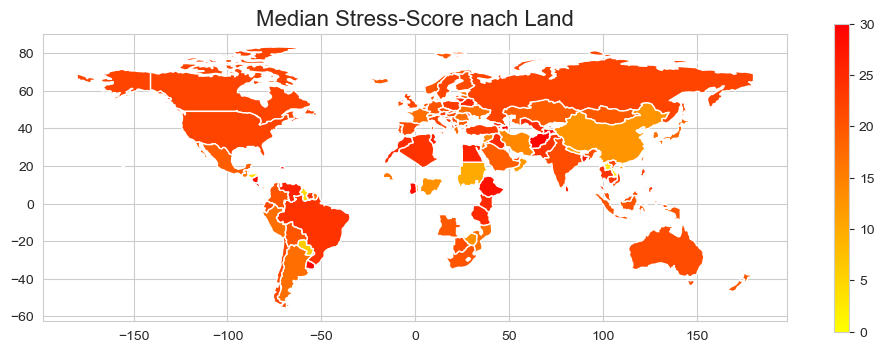

In [295]:
stress_data = data.groupby('country')['Stress'].median().reset_index()
stress_data['iso_a3'] = stress_data['country'].apply(get_iso_a3)
anxiety_data = stress_data[~stress_data['iso_a3'].duplicated()]
merged_data = world.merge(stress_data, on='iso_a3', how='left')
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Median Stress-Score nach Land', fontsize=16)
merged_data.plot(column='Stress', cmap='autumn_r', legend=True, ax=ax, vmin=0, vmax=30)
plt.show()
